# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 9.5

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
\nabla_{w} Q(w_{k}) = -\frac{2}{\ell}X^T(y-Xw)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

	
indobin@edu.hse.ru

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/70588/run-report/124448506/


* **StochasticDescent**: https://contest.yandex.ru/contest/70588/run-report/124679746/


* **MomentumDescent**: https://contest.yandex.ru/contest/70588/run-report/124457047/


* **Adam**: https://contest.yandex.ru/contest/70588/run-report/124459300/


* **LinearRegression**: https://contest.yandex.ru/contest/70588/run-report/124676366/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [9]:
categorical = ["kilometer", "vehicleType", "gearbox", "fuelType", "notRepairedDamage", "brand", "model"]
numeric = ["powerPS", "autoAgeMonths"]
other = []

# YOUR CODE (EDA):

kilometer тоже категориальный, так как он обладает ограниченным количеством значений

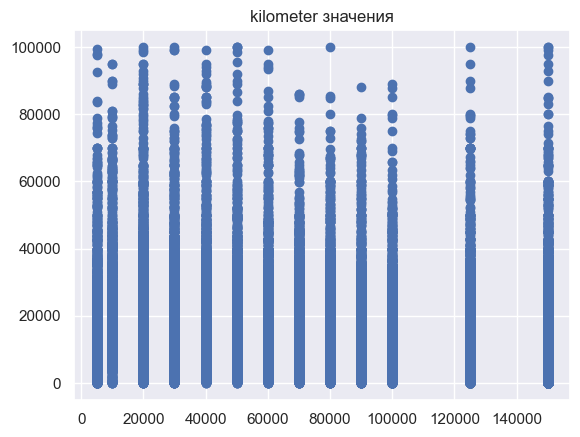

In [10]:
plt.scatter(data["kilometer"], data["price"])
plt.title("kilometer значения")
plt.show()

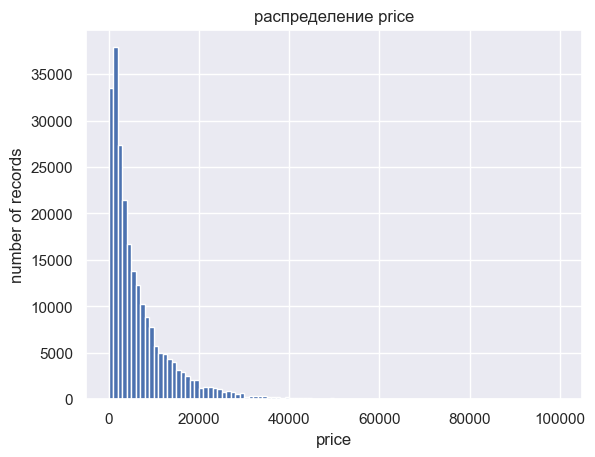

In [11]:
plt.hist(data["price"], bins=100)
plt.xlabel('price')
plt.ylabel('number of records')
plt.title("распределение price")
plt.show()

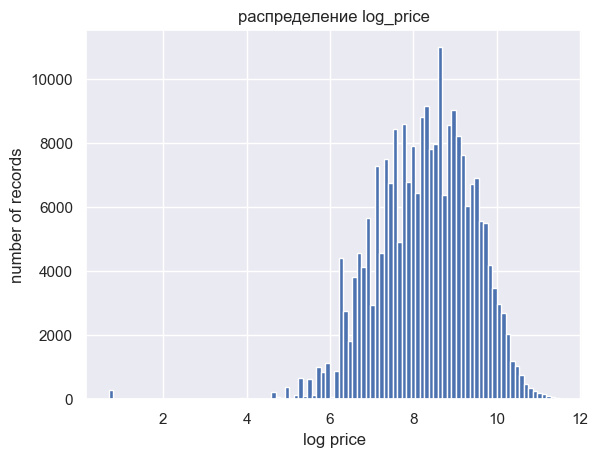

In [12]:
plt.hist(np.log1p(data['price']), bins=100)
plt.xlabel('log price')
plt.ylabel('number of records')
plt.title("распределение log_price")
plt.show()

Да, думаю стоит прологарифмировать price, так как распределение становится ближе к нормальному + виден выброс

In [13]:
data["log_price"] = np.log1p(data['price'])
data = data.drop(columns=["price"])
data = data[data["log_price"]>4]

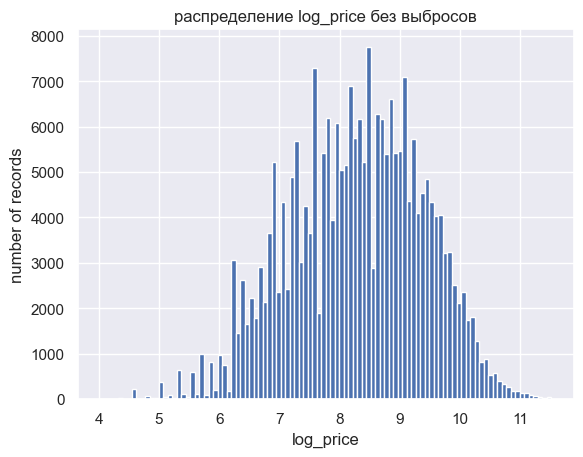

In [14]:
plt.hist(data["log_price"], bins=100)
plt.xlabel('log_price')
plt.ylabel('number of records')
plt.title("распределение log_price без выбросов")
plt.show()

In [15]:
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
log_price            float64
dtype: object

все числовые признаки - int, все категориальные - строки (object)

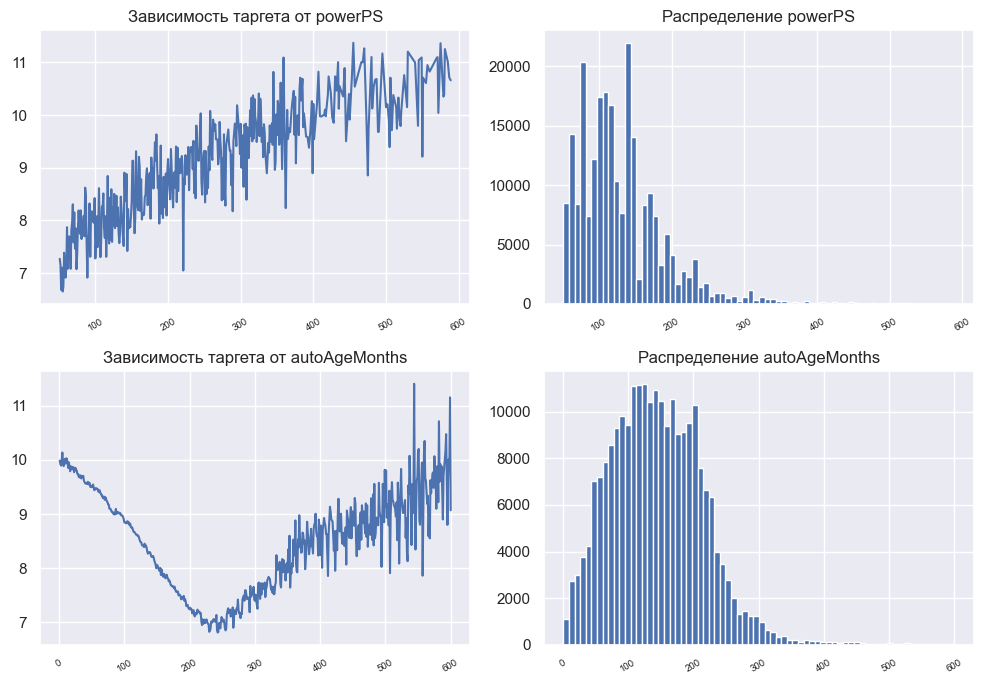

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
features = numeric
for i in range(len(features)):
    feature = features[i]
    ax_left = axes[i, 0]
    ax_right = axes[i, 1]
    
    y_left = data["log_price"].groupby(data[feature]).mean()
    x_left = y_left.index
    ax_left.plot(x_left, y_left)
    ax_left.set_title(f'Зависимость таргета от {feature}')
    ax_left.tick_params(axis='x', labelrotation=30, labelsize=7)
    
    ax_right.hist(data[feature], bins=70)
    ax_right.set_title(f'Распределение {feature}')
    ax_right.tick_params(axis='x', labelrotation=30, labelsize=7)


plt.tight_layout()
plt.show()

* `powerPS` - прослеживается тренд - чем больше powerPS, тем выше цена, но довольно большой разброс. Но в относительном количестве больших PowerPs очень мало, но убирать их смысла нет, так как разница в значениях таргета между большими и средними значениями PowerPs не сильно большая. Признак полезный
* `autoAgeMonths` - в наиболее часто встречающемся значении находится минимум таргета. Убирать выбросы смысла нет, так как разница в таргетах не настолько большая.

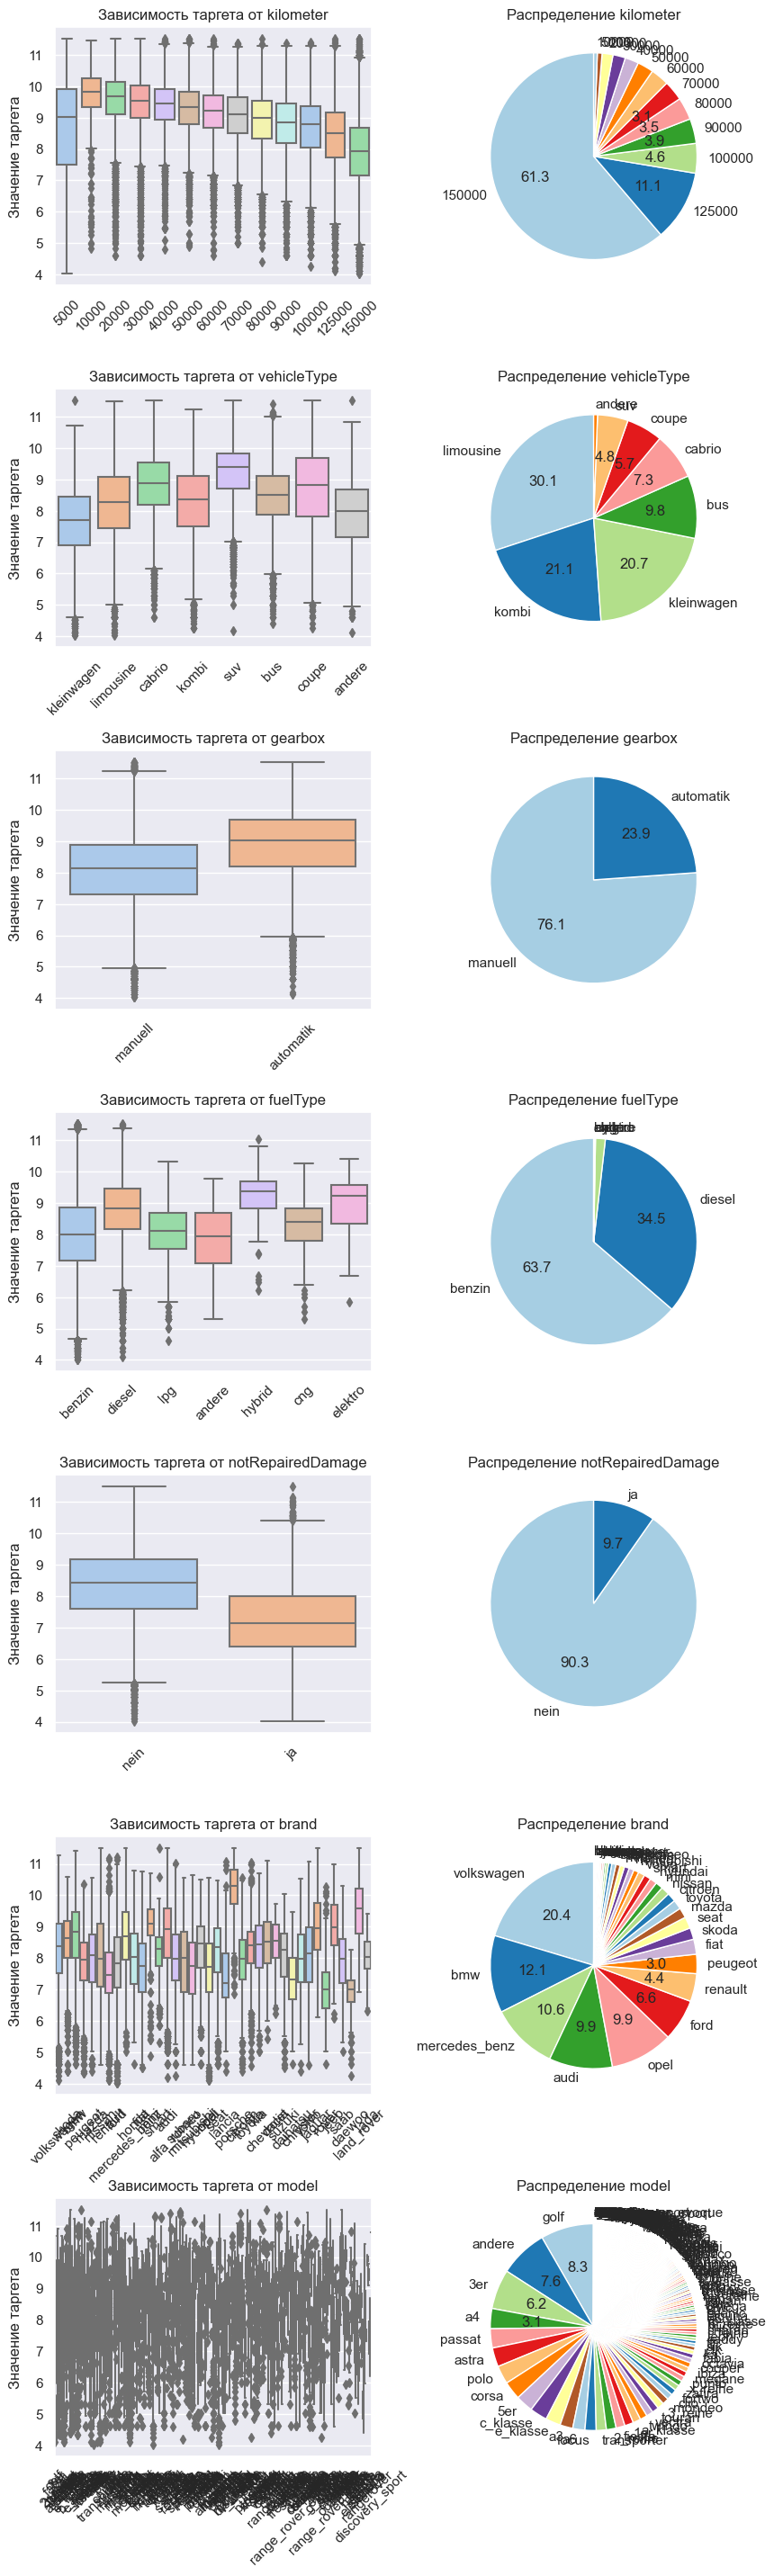

In [17]:
fig, axes = plt.subplots(7, 2, figsize=(10, 30))
features = categorical

def pct(pct):
    return f'{pct:.1f}' if pct>=3 else ''

fig.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4)

for i in range(len(features)):
    feature = features[i]
    ax_left = axes[i, 0]
    ax_right = axes[i, 1]
    
    sns.boxplot(
        x=feature, y="log_price", data=data, ax=ax_left, palette="pastel",
    )
    ax_left.set_title(f'Зависимость таргета от {feature}')
    ax_left.set_ylabel('Значение таргета')
    ax_left.set_xlabel("")
    ax_left.tick_params(axis='x', rotation=45)
    
    value_counts = data[feature].value_counts()
    ax_right.pie(value_counts, labels=value_counts.index, autopct=pct, startangle=90, colors=plt.cm.Paired.colors)
    ax_right.set_title(f'Распределение {feature}')
    

* `kilometer` - чем больше пробег, тем ниже цена на авто. Но машины с совсем маленьким пробегом - не максимальная цена. Выброс слева убирать смысла не вижу, мне кажется он хорошо интерпретируем и не хочется завышать цены для только выпущеных машин.
* `vehicleType` - полезный признак, так как большой разброс значений таргета, при этом выбросов нет
* `gearbox` - бинарный, признак полезный, так как значения таргета сильно различимы
* `fuelType` - выбросов нет, таргет не сильно колеблется от значения признака, не сильно полезный
* `notRepairedDamage` - бинарный, признак полезный, так как значения таргета сильно различимы
* `brand` - довольно тяжело, но можно заметить, что у porsche средняя цена сильно выше. Мне кажется будет целесообразным его убрать
* `model` - мессиво, тяжело оценить полезность и наличие выбросов

In [18]:
data = data[data["brand"]!="porsche"]

**Трансформации**: можно пробовать различные математические преобразования численных признаков по типу логарифма или возведения в степень, перемножения. Но мне не кажется, что это значительно улучшит модель. Также каких-то интересных зависимостей между признаками не вижу. Единственное, как мы видим из графиков сверху - model и brand сильно замусорены незначительными категориями, которые не вносят большой вклад. Я бы их совместил в одну категорию "other"

In [19]:
for feature in ["model", "brand"]:
    value_counts = data[feature].value_counts()
    k = 750 if feature == "model" else 300
    other1 = value_counts[value_counts<len(data[feature])/k].index
    data[feature] = data[feature].where(~data[feature].isin(other1), 'other')

In [20]:
data["brand"].unique()

array(['volkswagen', 'skoda', 'bmw', 'peugeot', 'mazda', 'nissan',
       'renault', 'ford', 'mercedes_benz', 'honda', 'fiat', 'mini',
       'smart', 'audi', 'alfa_romeo', 'other', 'mitsubishi', 'hyundai',
       'opel', 'seat', 'citroen', 'toyota', 'kia', 'chevrolet', 'suzuki',
       'chrysler', 'volvo'], dtype=object)

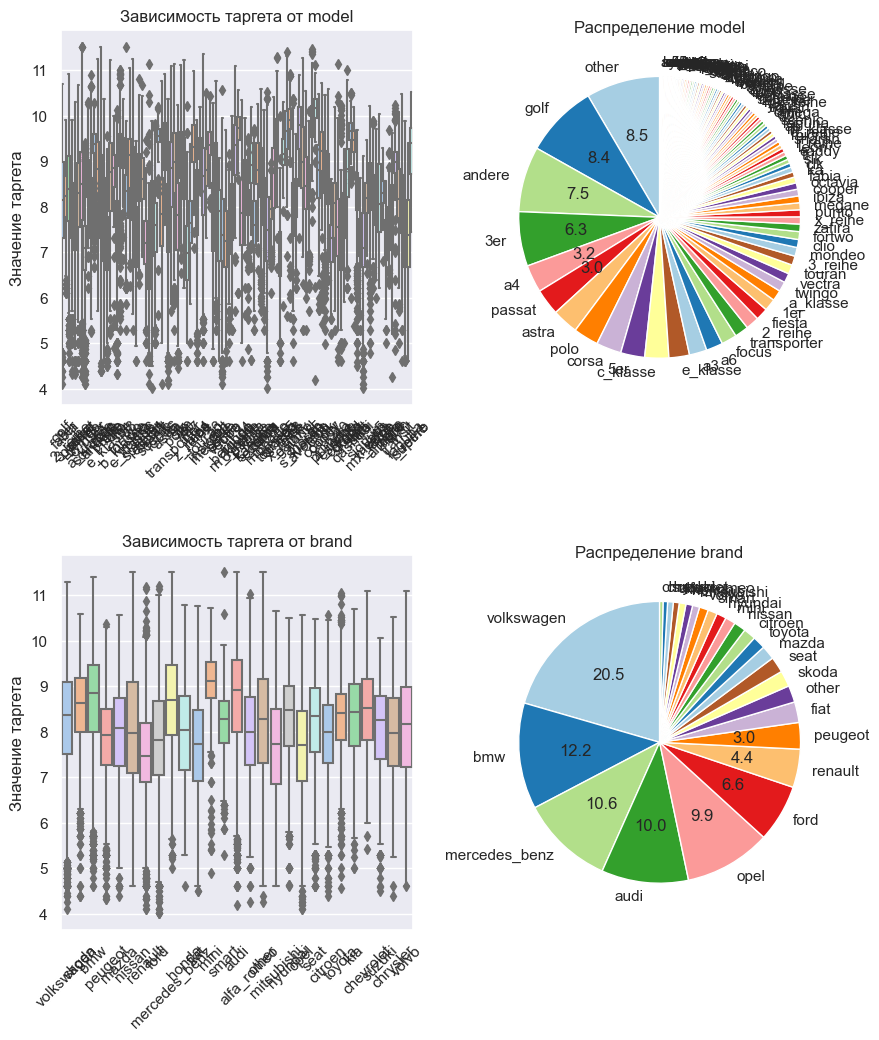

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
features = ["model", "brand"]

def pct(pct):
    return f'{pct:.1f}' if pct>=3 else ''

fig.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4)

for i in range(len(features)):
    feature = features[i]
    ax_left = axes[i, 0]
    ax_right = axes[i, 1]
    
    sns.boxplot(
        x=feature, y="log_price", data=data, ax=ax_left, palette="pastel",
    )
    ax_left.set_title(f'Зависимость таргета от {feature}')
    ax_left.set_ylabel('Значение таргета')
    ax_left.set_xlabel("")
    ax_left.tick_params(axis='x', rotation=45)
    
    value_counts = data[feature].value_counts()
    ax_right.pie(value_counts, labels=value_counts.index, autopct=pct, startangle=90, colors=plt.cm.Paired.colors)
    ax_right.set_title(f'Распределение {feature}')
    

In [22]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [24]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=94)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=94) # 0.5 * 0.2 = 0.1

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [25]:
# YOUR CODE:
from sklearn.metrics import mean_squared_error, r2_score
descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': 172,
        'lambda_': 0
    }
}
iter_dict = {}
lambda_values = np.logspace(-6, -0.4, 6)
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    best_val_error = 10**5
    best_lambda = None
    best_iterations = []
    print(descent_name, ":\n")
    for lam in lambda_values:
        descent_config['descent_name'] = descent_name
        descent_config['kwargs']['lambda_'] = lam
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(X_train, y_train)
        
        y_val_pred = regression.predict(X_val)
        val_error = regression.calc_loss(X_val, y_val)
        r2 = r2_score(y_val, y_val_pred)
        print("lambda:", lam, " mse:", val_error, " r2: ", r2)
        if (val_error < best_val_error):
            best_val_error = val_error
            best_lambda = lam
            best_iterations = regression.loss_history
    iter_dict[descent_name] = best_iterations
    
    print("\n best mse: ", best_val_error, ' lambda: ', best_lambda, '\n')



full :

lambda: 1e-06  mse: 16.156208491574723  r2:  -12.133951067586748
lambda: 1.3182567385564074e-05  mse: 13.630929301191792  r2:  -10.081062647894676
lambda: 0.00017378008287493744  mse: 17.133403879863454  r2:  -12.928347625414574
lambda: 0.00229086765276777  mse: 18.978082460633267  r2:  -14.42795183192693
lambda: 0.03019951720402013  mse: 1.5022863465669287  r2:  -0.22126149681734897
lambda: 0.3981071705534972  mse: 0.4065664874083586  r2:  0.6694877790091243

 best mse:  0.4065664874083586  lambda:  0.3981071705534972 

stochastic :

lambda: 1e-06  mse: 18.232184606395847  r2:  -13.82158518816388
lambda: 1.3182567385564074e-05  mse: 27.2199202429273  r2:  -21.128032125894883
lambda: 0.00017378008287493744  mse: 15.269422647028243  r2:  -11.413051613003956
lambda: 0.00229086765276777  mse: 17.22933601303706  r2:  -13.006334236169714
lambda: 0.03019951720402013  mse: 1.3185199899978362  r2:  -0.071871351455842
lambda: 0.3981071705534972  mse: 0.3578940284486282  r2:  0.709055335

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

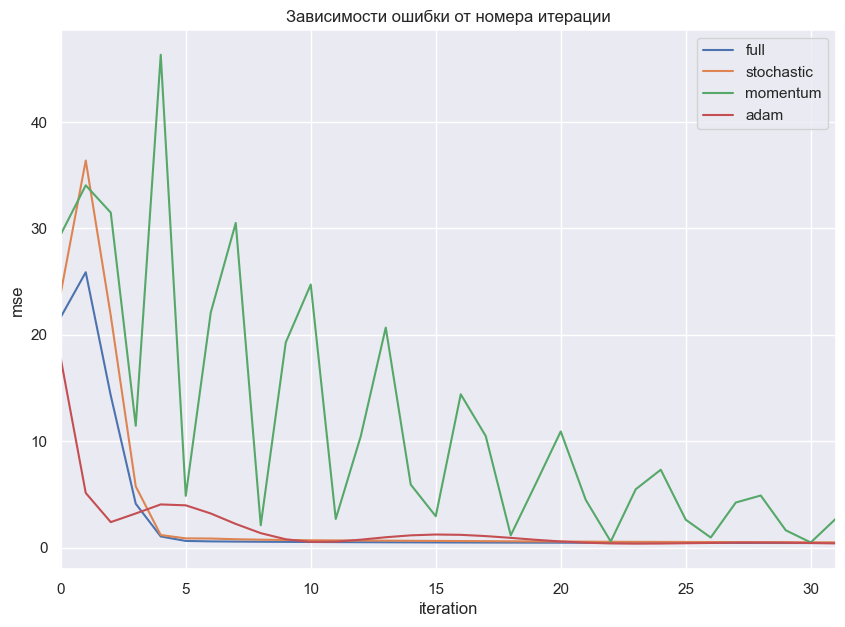

In [26]:
# YOUR CODE:
plt.figure(figsize=(10, 7))

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    loss_history = iter_dict[descent_name]
    plt.plot(loss_history, label=descent_name)

plt.legend()
plt.xlabel('iteration')
plt.ylabel('mse')
plt.title('Зависимости ошибки от номера итерации')
plt.xlim(0, 31)
plt.show()

Для начала заметим, что stochastic и full практически идентичны, не зря stochastic является оценкой обычного градиента. До минимума дошли в один момент. Momentum сильно колеблется, что логично так как градиент накапливает вес. Видимо дефолтный параметр alpha слишком большой и накопленный вес слишком сильно влияет на общее направление. adam приблизился к минимуму быстрее всего, но не остановился из-за накопления веса и полетел немного вверх, но быстро выравнился в отличие от momentum

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [27]:
# YOUR CODE:
import time

batch_sizes = np.arange(5, 500, 10)

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': 172,
        'lambda_': 0.3619757510370844,
        'batch_size': None
    }
}

k=10

mean_time = {}
mean_iterations = {}
for batch_size in batch_sizes:
    times = []
    iterations = []
    for _ in range(k):
        descent_config['kwargs']['batch_size'] = batch_size
        regression = LinearRegression(descent_config=descent_config)
        time0 = time.time()
        regression.fit(X_train, y_train)
        time1 = time.time()
        res_time = time1-time0
        times.append(res_time)
        loss_history = regression.loss_history
        iterations.append(len(loss_history))
    mean_time[batch_size] = sum(times)/len(times)
    mean_iterations[batch_size] = sum(iterations)/len(iterations)
    print("batch_size = ",
          batch_size,
          " mean time: ",
          mean_time[batch_size],
          " mean_iterations: ", 
          mean_iterations[batch_size])

batch_size =  5  mean time:  2.5694179058074953  mean_iterations:  250.8
batch_size =  15  mean time:  2.238360357284546  mean_iterations:  220.9
batch_size =  25  mean time:  1.9551917552947997  mean_iterations:  198.3
batch_size =  35  mean time:  1.7351558923721313  mean_iterations:  162.0
batch_size =  45  mean time:  1.5916097164154053  mean_iterations:  148.0
batch_size =  55  mean time:  1.254472303390503  mean_iterations:  136.9
batch_size =  65  mean time:  1.2295012950897217  mean_iterations:  128.7
batch_size =  75  mean time:  1.2826639890670777  mean_iterations:  113.8
batch_size =  85  mean time:  1.0166766166687011  mean_iterations:  100.5
batch_size =  95  mean time:  1.0021118640899658  mean_iterations:  115.1
batch_size =  105  mean time:  0.8862697124481201  mean_iterations:  96.4
batch_size =  115  mean time:  0.8760414600372315  mean_iterations:  98.6
batch_size =  125  mean time:  0.7160491228103638  mean_iterations:  88.4
batch_size =  135  mean time:  0.99176371

Text(0, 0.5, 'iterations')

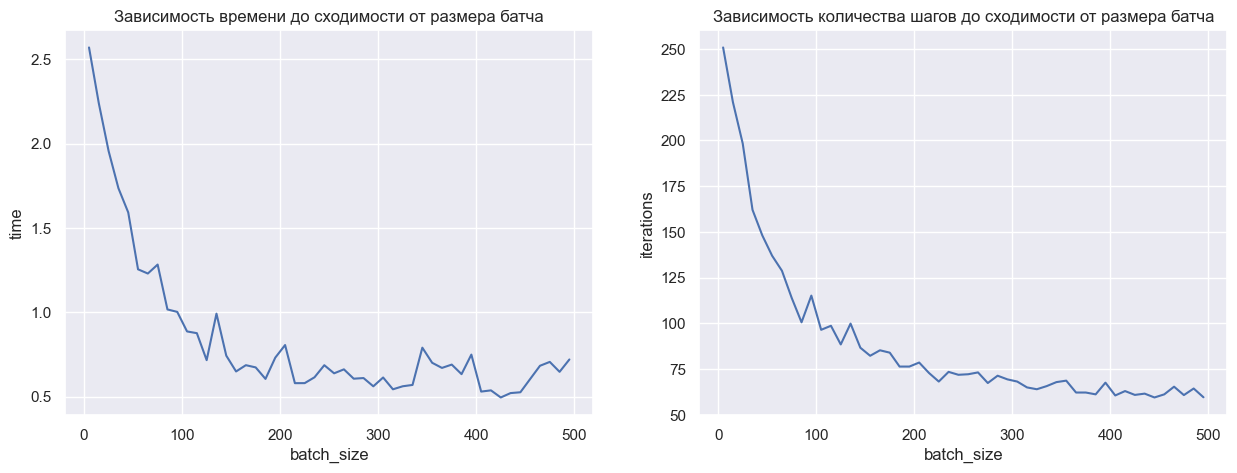

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax_left = axes[0]
ax_right = axes[1]

ax_left.plot(batch_sizes, mean_time.values())
ax_left.set_title('Зависимость времени до сходимости от размера батча')
ax_left.set_xlabel('batch_size')
ax_left.set_ylabel('time')

ax_right.plot(batch_sizes, mean_iterations.values())
ax_right.set_title('Зависимость количества шагов до сходимости от размера батча')
ax_right.set_xlabel('batch_size')
ax_right.set_ylabel('iterations')

Можем заметить, что батчи размером < 200 сильно менее эффективны как по времени, так и по количеству шагов. Но увеличивая батч дальше, ситуация значительно не меняется по обоим параметрам

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [29]:
# YOUR CODE:

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

Пусть x - это $X^{(i)}$

$$dL(y, a) = d \log (cosh (x\cdot w - y)) = \frac{d(cosh{xw - y})}{cosh{xw - y}}  =\frac{sinh{xw - y}}{cosh{xw - y}} d(xw - y) = {th (xw - y)}\cdot x \cdot dw$$ 

$$dL(y, w) = \frac{1}{l}\cdot (th(Xw - y))^T \cdot X \cdot dw$$


$$\Rightarrow \nabla_{w} L = \cfrac{1}{l}\cdot X^T \cdot (th (Xw - y))$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [30]:
# YOUR CODE:
from descents import LossFunction
import linear_regression

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': 172,
        'lambda_': 0.3981071705534972,
        'loss_function': None
    }
}
iter_dict = {}
lambda_values = np.logspace(-6, -0.4, 6)
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(descent_name, ":")
    descent_config['descent_name'] = descent_name
    for L in [LossFunction.MSE, LossFunction.LogCosh]:
        descent_config['kwargs']['loss_function'] = L
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(X_train, y_train)
        
        y_val_pred = regression.predict(X_val)
        val_error = regression.calc_loss(X_val, y_val)
        
        r2 = r2_score(y_val, y_val_pred)
        iter_dict[descent_name + str(L)[13:]] = regression.loss_history
        print("  using", str(L)[13:], ", error: ", val_error, "r2: ", r2)
    print("\n")

full :
  using MSE , error:  0.40497927212803103 r2:  0.6707780822282503
  using LogCosh , error:  0.8113455396373097 r2:  0.3404286270471032


stochastic :
  using MSE , error:  0.3756416436037118 r2:  0.6946276740231558
  using LogCosh , error:  0.810990859630289 r2:  0.34071695892022114


momentum :
  using MSE , error:  0.2854974324555176 r2:  0.7679090790547887
  using LogCosh , error:  0.3408793473837497 r2:  0.7228871692994167


adam :
  using MSE , error:  0.26901464691250865 r2:  0.7813085161128274
  using LogCosh , error:  0.27439607950004136 r2:  0.7769337599740322




На всех методах MSE показывает результаты лучше, в full и stochastic значительно

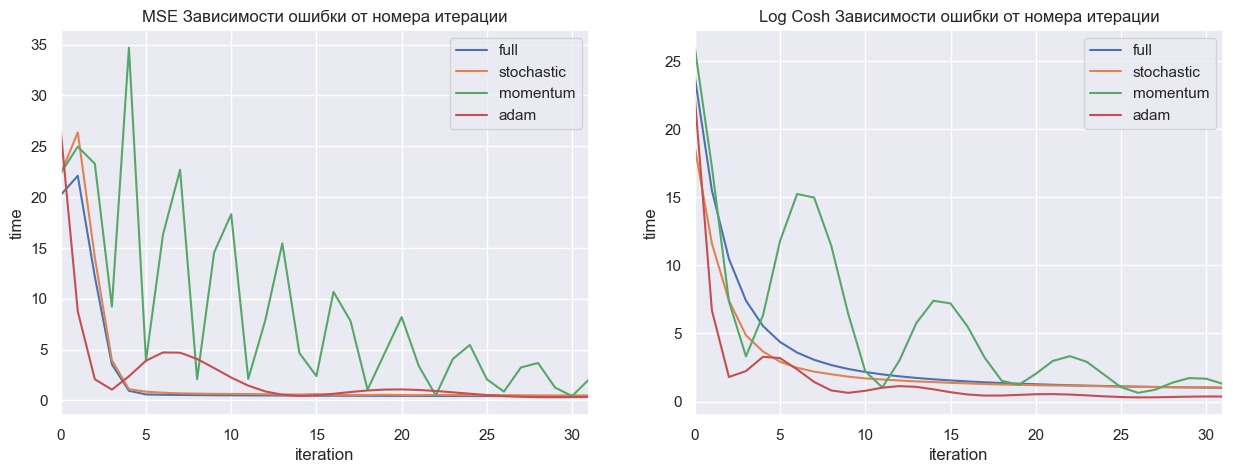

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax_left = axes[0]
ax_right = axes[1]


for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    loss_history = iter_dict[descent_name + "MSE"]
    ax_left.plot(loss_history, label=descent_name)
    loss_history = iter_dict[descent_name + "LogCosh"]
    ax_right.plot(loss_history, label=descent_name)



ax_left.set_title('MSE Зависимости ошибки от номера итерации')
ax_left.set_xlabel('iteration')
ax_left.set_ylabel('time')
ax_left.set_xlim(0,31)
ax_left.legend()

ax_right.set_title('Log Cosh Зависимости ошибки от номера итерации')
ax_right.set_xlabel('iteration')
ax_right.set_ylabel('mse')
ax_right.set_ylabel('time')
ax_right.set_xlim(0,31)
ax_right.legend()



plt.show()

моментум стал меньше колебаться, все методы более плавно приближались к оптимуму

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

# ИРКУТСКИЕ ПЕЛЬМЕНИ С СУПЕР ВКУСНЫМ СМЕТАННЫМ СОУСОМ

![](аппетит1.jpg)

для начала рецепт соуса:
* вываливаем сметану, желательно чтобы она была как можно гуще
* нарезаем укроп, натираем немного чеснока по вкусу
* добавляем соевого соуса 
* добавляем томатной пасты или кетчупа
* перемешиваем

![](аппетит3.jpg)

Теперь обжариваем пельмени и немного тушим на сковородке

![](аппетит2.jpg)

Получаем вот такое идеальнейшее блюдо, которым можно угостить кого угодно

![](аппетит4.jpg)

Однако я очень злой и все съел сам, чтобы другим не досталось. Да я такой.

![](аппетит6.jpg)

На фото я. Довольный

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: